In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df = pd.read_csv('reviews_google_sin_normalizar.csv', sep='|')
df.head()

review_id              google_id        date  rating  \
0          0  103650800402109980585  2007-09-19       1   
1        500  115797029886135341723  2014-10-12       5   
2       1336  111057971366565215316  2016-01-08       5   
3      17466  108750620226319011249  2018-02-15       5   
4      17772  110879866964329858202  2018-02-22       5   

                                              review  \
0  Called on Saturday, would not see us even thou...   
1  I have met 3 of the vets here and appreciate a...   
2  The Animal Doctor has been our vet for about 1...   
3      Excellent boarding and veterinary services...   
4            Greatr place.  The doctors really care.   

                                 gmap_id  business_id  \
0  0x880f0cae93214435:0x328a1fd2d302c34f         6995   
1  0x880f0cae93214435:0x328a1fd2d302c34f         6995   
2  0x880f0cae93214435:0x328a1fd2d302c34f         6995   
3  0x880f0cae93214435:0x328a1fd2d302c34f         6995   
4  0x880f0cae93214435:0x328a1fd2d302c34f         6995   

                         business_name  \
0  The Animal Doctor of Cary, Illinois   
1  The Animal Doctor of Cary, Illinois   
2  The Animal Doctor of Cary, Illinois   
3  The Animal Doctor of Cary, Illinois   
4  The Animal Doctor of Cary, Illinois   

                                             address   latitude  longitude  \
0  The Animal Doctor of Cary, Illinois, 815 Feinb...  42.216739 -88.252859   
1  The Animal Doctor of Cary, Illinois, 815 Feinb...  42.216739 -88.252859   
2  The Animal Doctor of Cary, Illinois, 815 Feinb...  42.216739 -88.252859   
3  The Animal Doctor of Cary, Illinois, 815 Feinb...  42.216739 -88.252859   
4  The Animal Doctor of Cary, Illinois, 815 Feinb...  42.216739 -88.252859   

                                            category  avg_rating  \
0  ['Animal hospital', 'Acupuncture clinic', 'Gym...         4.8   
1  ['Animal hospital', 'Acupuncture clinic', 'Gym...         4.8   
2  ['Animal hospital', 'Acupuncture clinic', 'Gym...         4.8   
3  ['Animal hospital', 'Acupuncture clinic', 'Gym...         4.8   
4  ['Animal hospital', 'Acupuncture clinic', 'Gym...         4.8   

   num_of_reviews state  
0             213    IL  
1             213    IL  
2             213    IL  
3             213    IL  
4             213    IL

# EDA: Análisis Exploratorio de Datos

In [3]:
# No hay nulos, el dataset está limpio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41678 entries, 0 to 41677
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       41678 non-null  int64  
 1   google_id       41678 non-null  object 
 2   date            41678 non-null  object 
 3   rating          41678 non-null  int64  
 4   review          41678 non-null  object 
 5   gmap_id         41678 non-null  object 
 6   business_id     41678 non-null  int64  
 7   business_name   41678 non-null  object 
 8   address         41678 non-null  object 
 9   latitude        41678 non-null  float64
 10  longitude       41678 non-null  float64
 11  category        41678 non-null  object 
 12  avg_rating      41678 non-null  float64
 13  num_of_reviews  41678 non-null  int64  
 14  state           41678 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 4.8+ MB


In [4]:
# Revisadas las columna, solamente se cambia date a formato datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41678 entries, 0 to 41677
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_id       41678 non-null  int64         
 1   google_id       41678 non-null  object        
 2   date            41678 non-null  datetime64[ns]
 3   rating          41678 non-null  int64         
 4   review          41678 non-null  object        
 5   gmap_id         41678 non-null  object        
 6   business_id     41678 non-null  int64         
 7   business_name   41678 non-null  object        
 8   address         41678 non-null  object        
 9   latitude        41678 non-null  float64       
 10  longitude       41678 non-null  float64       
 11  category        41678 non-null  object        
 12  avg_rating      41678 non-null  float64       
 13  num_of_reviews  41678 non-null  int64         
 14  state           41678 non-null  object        
dtypes:

In [107]:
# Cantidad de Hoteles en todo EEUU en los datos de GoogleMaps
len(df['business_id'].unique())

1912

In [75]:
#  Cantidad de reviews por estado

nrv = df.groupby('state')['review'].count().reset_index(name='N_Reviews')
nrv

state  N_Reviews
0     AK         17
1     AL        568
2     AR        264
3     AZ       1323
4     CA       2589
5     CO       2919
6     CT        227
7     DC         22
8     DE         73
9     FL       2130
10    GA       1309
11    HI        340
12    IA        658
13    ID        192
14    IL        736
15    IN        434
16    KS        284
17    KY        326
18    LA        704
19    MA        280
20    MD        380
21    ME        139
22    MI       1231
23    MN       1205
24    MO       1268
25    MS        806
26    MT        265
27    NC        895
28    ND        134
29    NE        944
30    NH        101
31    NJ        556
32    NM        510
33    NV        999
34    NY       1630
35    OH       1434
36    OK       3761
37    OR        557
38    PA       1438
39    RI         64
40    SC        667
41    SD        223
42    TN        912
43    TX       1859
44    UT        304
45    VA       1083
46    VT         35
47    WA       1344
48    WI       1429
49    WV         94
50    WY         16

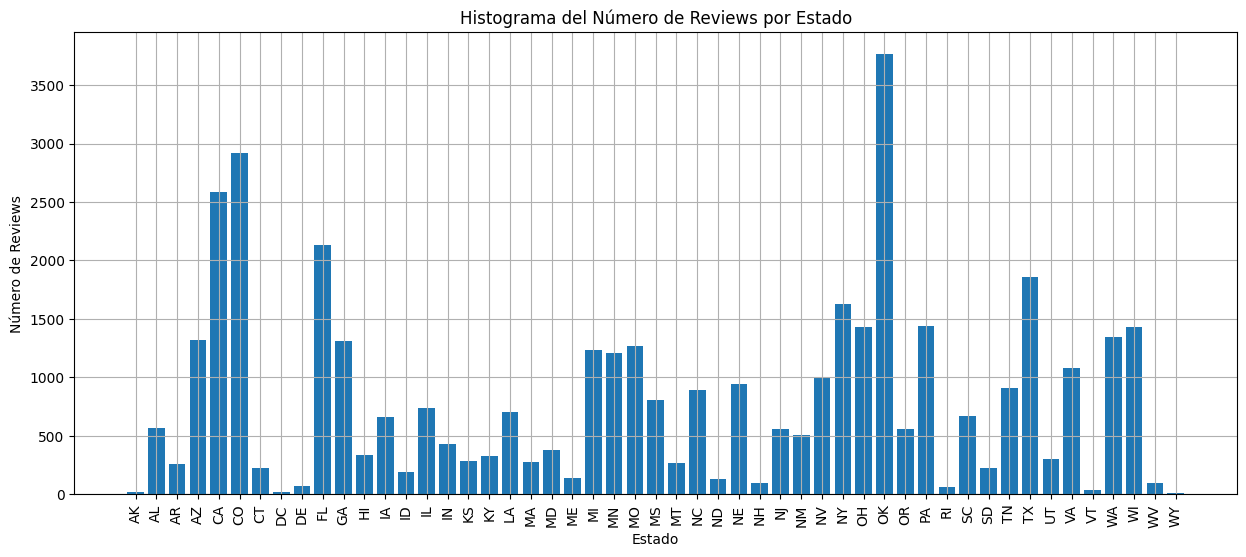

In [77]:
# Histograma de cantidad de reviews por Estado
# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(nrv['state'], nrv['N_Reviews'])
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.title('Histograma del Número de Reviews por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

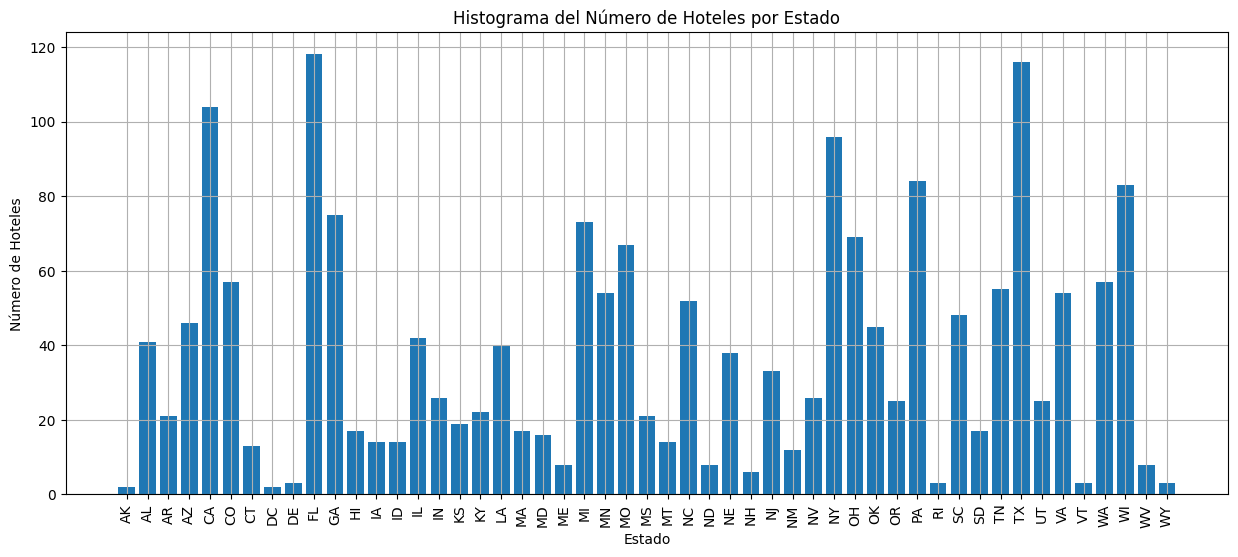

In [85]:
nhoteles = df.groupby('state')['business_id'].nunique().reset_index(name='N_Hoteles')
# Histograma de cantidad de hoteles por Estado
# Crear el histograma
plt.figure(figsize=(15, 6))
plt.bar(nhoteles['state'], nhoteles['N_Hoteles'])
plt.xlabel('Estado')
plt.ylabel('Número de Hoteles')
plt.title('Histograma del Número de Hoteles por Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

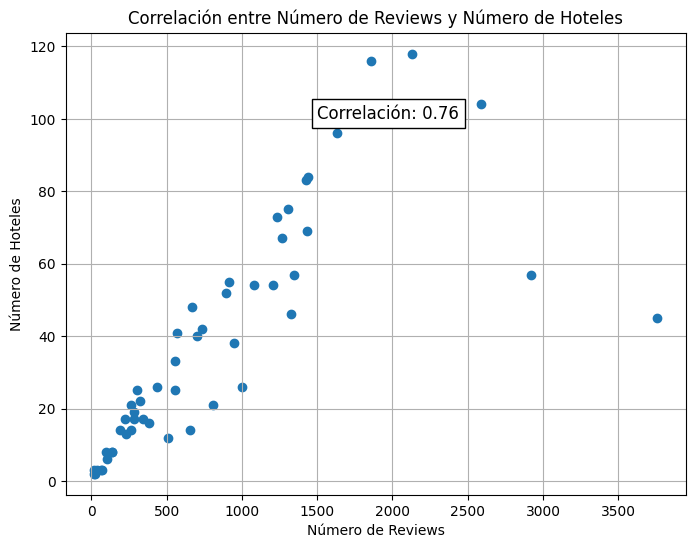

In [93]:
# Correlación entre número de hoteles y número de reviews

corr = pd.merge(nrv, nhoteles, on=['state'])

# Calcular la correlación

correlation = corr['N_Reviews'].corr(corr['N_Hoteles'])

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(corr['N_Reviews'], corr['N_Hoteles'])
plt.xlabel('Número de Reviews')
plt.ylabel('Número de Hoteles')
plt.title('Correlación entre Número de Reviews y Número de Hoteles')
plt.grid(True)
plt.text(1500, 100, f'Correlación: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

### En términos generales hay correlación entre número de reviews con el número de hoteles, excepto por un par de outliers. Oklahoma con 45 hoteles tiene 3761 reviews y Colorado con 57 hoteles y 2919 reviews

In [97]:
corr['Ratio rv_hotel'] = corr['N_Reviews'] / corr['N_Hoteles']

In [98]:
corr

state  N_Reviews  N_Hoteles  Ratio rv_hotel
0     AK         17          2        8.500000
1     AL        568         41       13.853659
2     AR        264         21       12.571429
3     AZ       1323         46       28.760870
4     CA       2589        104       24.894231
5     CO       2919         57       51.210526
6     CT        227         13       17.461538
7     DC         22          2       11.000000
8     DE         73          3       24.333333
9     FL       2130        118       18.050847
10    GA       1309         75       17.453333
11    HI        340         17       20.000000
12    IA        658         14       47.000000
13    ID        192         14       13.714286
14    IL        736         42       17.523810
15    IN        434         26       16.692308
16    KS        284         19       14.947368
17    KY        326         22       14.818182
18    LA        704         40       17.600000
19    MA        280         17       16.470588
20    MD        380         16       23.750000
21    ME        139          8       17.375000
22    MI       1231         73       16.863014
23    MN       1205         54       22.314815
24    MO       1268         67       18.925373
25    MS        806         21       38.380952
26    MT        265         14       18.928571
27    NC        895         52       17.211538
28    ND        134          8       16.750000
29    NE        944         38       24.842105
30    NH        101          6       16.833333
31    NJ        556         33       16.848485
32    NM        510         12       42.500000
33    NV        999         26       38.423077
34    NY       1630         96       16.979167
35    OH       1434         69       20.782609
36    OK       3761         45       83.577778
37    OR        557         25       22.280000
38    PA       1438         84       17.119048
39    RI         64          3       21.333333
40    SC        667         48       13.895833
41    SD        223         17       13.117647
42    TN        912         55       16.581818
43    TX       1859        116       16.025862
44    UT        304         25       12.160000
45    VA       1083         54       20.055556
46    VT         35          3       11.666667
47    WA       1344         57       23.578947
48    WI       1429         83       17.216867
49    WV         94          8       11.750000
50    WY         16          3        5.333333

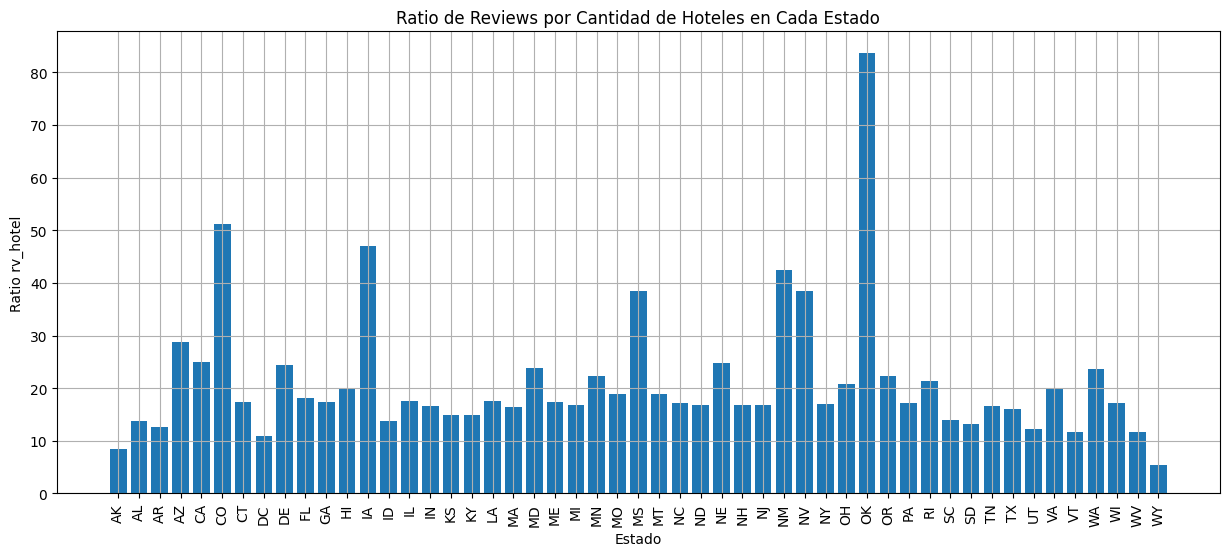

In [99]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(corr['state'], corr['Ratio rv_hotel'])
plt.xlabel('Estado')
plt.ylabel('Ratio rv_hotel')
plt.title('Ratio de Reviews por Cantidad de Hoteles en Cada Estado')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [104]:
# cantidad de reviews por año
# Reviews por año
reviewsanio = df.groupby(df['date'].dt.year)['review'].count().reset_index(name='N_Reviews')
reviewsanio

date  N_Reviews
0   2007          2
1   2008          3
2   2009          4
3   2010         10
4   2011         46
5   2012         74
6   2013        153
7   2014        212
8   2015        648
9   2016       4625
10  2017       8622
11  2018      11657
12  2019       9181
13  2020       4251
14  2021       2190

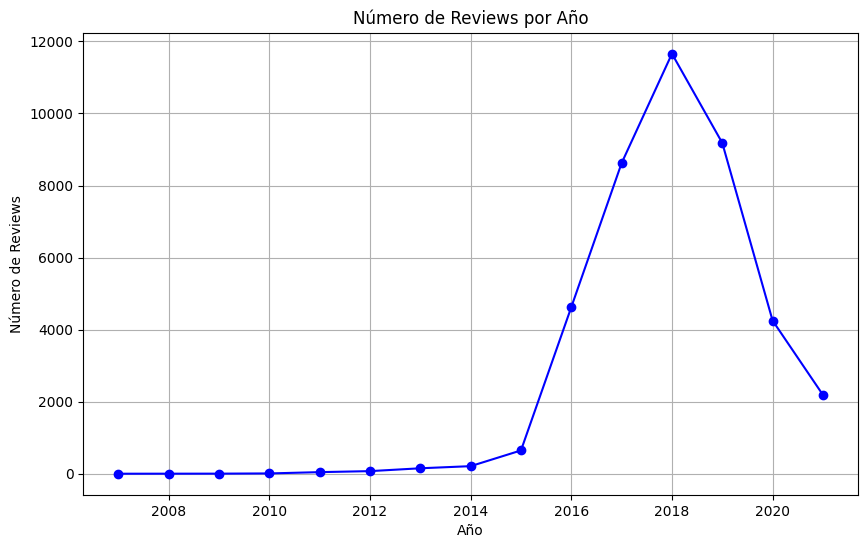

In [105]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviewsanio['date'], reviewsanio['N_Reviews'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Año')
plt.grid(True)
plt.show()

In [136]:
# Obtener el nombre del mes y ordenarlos por el orden deseado
month_order = list(calendar.month_name)[1:]  # Lista de meses sin el primer elemento vacío
df['month_name'] = df['date'].dt.month.map(lambda x: calendar.month_name[x])
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Reviews por mes ordenados por el orden deseado
reviewsmes = df.groupby('month_name')['review'].count().reset_index(name='N_Reviews')
print(reviewsmes)

   month_name  N_Reviews
0     January       3259
1    February       3237
2       March       3605
3       April       3048
4         May       3493
5        June       3987
6        July       4373
7      August       4104
8   September       3563
9     October       3244
10   November       2774
11   December       2991


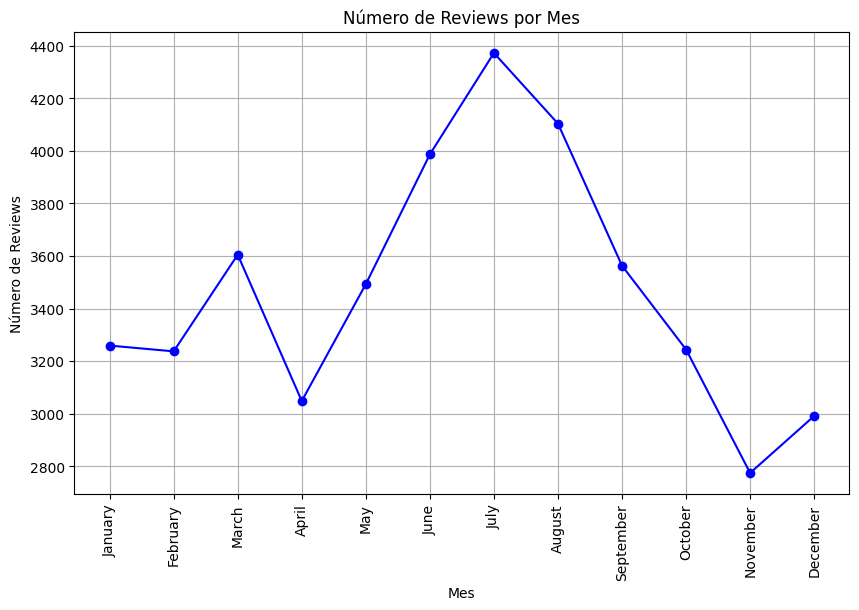

In [137]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviewsmes['month_name'], reviewsmes['N_Reviews'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# KPI: 
## El número de reviews mes por mes nos indica que los meses de mayor ocupación en Hoteles en Estados Unidos se da en periodos vacacionales. Encontramos un pequeño pico en Marzo que concide con Spring Break y en vacaciones de Verano entre Julio y Agosto. Por otra parte, el pico más bajo se encuentra en el mes de Noviembre, coincidiendo con Thanks Giving, fecha en la cual todas las personas pasan tiempo con familiares y amigos en sus respectivos hogares.

In [121]:
# avg rating y sentiment por estado
# Análisis de sentimiento de los hoteles en general
df['sentiment'] = df['review'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Promedio de Análisis de sentimiento de los hoteles en todo el país
sentiment = df.groupby('state')['sentiment'].mean().reset_index(name="sentiment")
promedio_rating_por_state = df.groupby('state')['rating'].mean().reset_index(name='avg_rating')
# Merge 
hoteles = pd.merge(promedio_rating_por_state, sentiment, on=('state'))
hoteles

state  avg_rating  sentiment
0     AK    3.647059   0.286327
1     AL    3.637324   0.290910
2     AR    3.829545   0.296648
3     AZ    3.408919   0.236973
4     CA    3.954036   0.335644
5     CO    4.193902   0.372245
6     CT    3.731278   0.325986
7     DC    3.954545   0.333392
8     DE    4.616438   0.498072
9     FL    3.945070   0.353670
10    GA    3.378915   0.235214
11    HI    3.832353   0.325236
12    IA    3.974164   0.360902
13    ID    4.432292   0.463265
14    IL    3.864130   0.328157
15    IN    3.854839   0.328264
16    KS    3.820423   0.318188
17    KY    3.760736   0.344311
18    LA    3.526989   0.249547
19    MA    4.096429   0.400568
20    MD    4.057895   0.408574
21    ME    3.899281   0.389474
22    MI    3.902518   0.356009
23    MN    4.120332   0.410126
24    MO    3.858833   0.335401
25    MS    4.027295   0.392967
26    MT    3.811321   0.321368
27    NC    4.015642   0.354464
28    ND    4.134328   0.398996
29    NE    3.256356   0.227910
30    NH    3.762376   0.377291
31    NJ    3.796763   0.313766
32    NM    3.998039   0.354468
33    NV    4.018018   0.354351
34    NY    3.955828   0.357664
35    OH    3.313110   0.229556
36    OK    3.850838   0.337367
37    OR    4.175943   0.381520
38    PA    4.011127   0.373695
39    RI    4.046875   0.389167
40    SC    4.086957   0.375028
41    SD    3.811659   0.334312
42    TN    3.662281   0.308758
43    TX    3.773534   0.303439
44    UT    3.963816   0.348509
45    VA    3.527239   0.278412
46    VT    4.714286   0.636025
47    WA    3.672619   0.288087
48    WI    4.125962   0.416341
49    WV    3.617021   0.325273
50    WY    3.562500   0.311445

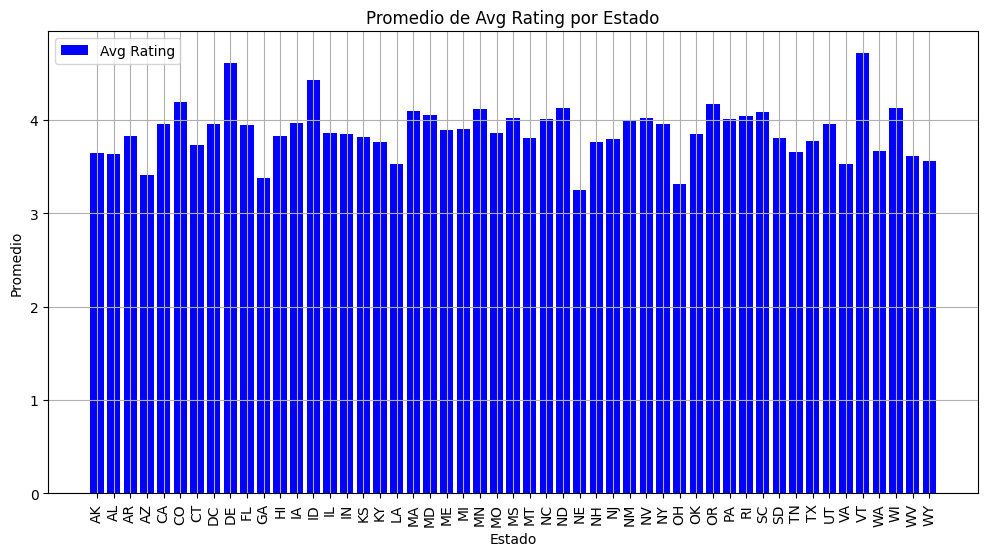

In [124]:
# Crear el gráfico de barras stacked
plt.figure(figsize=(12, 6))
plt.bar(hoteles['state'], hoteles['avg_rating'], label='Avg Rating', color='b')
plt.xlabel('Estado')
plt.ylabel('Promedio')
plt.title('Promedio de Avg Rating por Estado')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

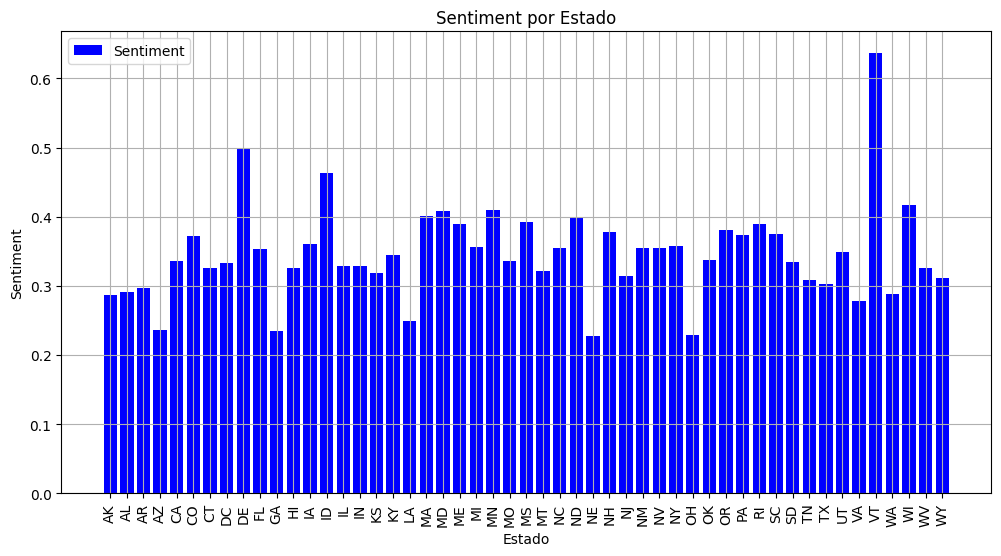

In [125]:
# Crear el gráfico de barras stacked
plt.figure(figsize=(12, 6))
plt.bar(hoteles['state'], hoteles['sentiment'], label='Sentiment', color='b')
plt.xlabel('Estado')
plt.ylabel('Sentiment')
plt.title('Sentiment por Estado')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Obtener solamente los Hoteles de la Cadena Ramada

# Filtrar las filas donde 'business_name' contiene la palabra "Ramada"
filtro_ramada = df[df['business_name'].str.contains('Ramada', case=False)]

# Imprimir el DataFrame filtrado
filtro_ramada.shape

(395, 15)

In [141]:
filtro_ramada.groupby('business_name')['review'].count().reset_index(name='N_Reviews')

business_name  N_Reviews
0                                   Ramada Alexandria         17
1   Ramada Amherst/Getzville Hotel and Conference ...         13
2    Ramada Bloomington Minneapolis Airport/Mall Area         23
3                           Ramada Clearwater Airport         10
4                      Ramada Flagstaff West Near NAU         12
5                                     Ramada Glendale         38
6                                     Ramada Gulfport         17
7                                 Ramada Jacksonville          6
8         Ramada Morgantown Hotel & Conference Center         21
9                                       Ramada Mystic          8
10                                Ramada Plaza Dayton         30
11          Ramada Plaza by Wyndham Rochester Airport         50
12    Ramada San Jose Downtown Near Convention Center         24
13                                   Ramada St Joseph         11
14          Ramada Toledo Hotel and Conference Center         19
15                                 Ramada Tucson East         20
16                          Ramada by Wyndham Clinton         21
17                         Ramada by Wyndham Monument         55

In [18]:
# Estados en los que Ramada Tiene Presencia
filtro_ramada['state'].unique()

array(['OH', 'CA', 'AZ', 'NC', 'MO', 'LA', 'WV', 'MN', 'NY', 'MS', 'FL',
       'CO', 'CT', 'OK'], dtype=object)

In [7]:
# KPI: Cantidad de Hoteles Ramada por Estado en donde tiene presencia
filtro_ramada['state'].value_counts()

AZ    70
NY    63
CO    55
OH    49
CA    24
MN    23
WV    21
OK    21
LA    17
MS    17
MO    11
FL    10
CT     8
NC     6
Name: state, dtype: int64

## Los Estados en los que Ramada tiene mayor representación son: Arizona, New York, Colorado y Ohio.

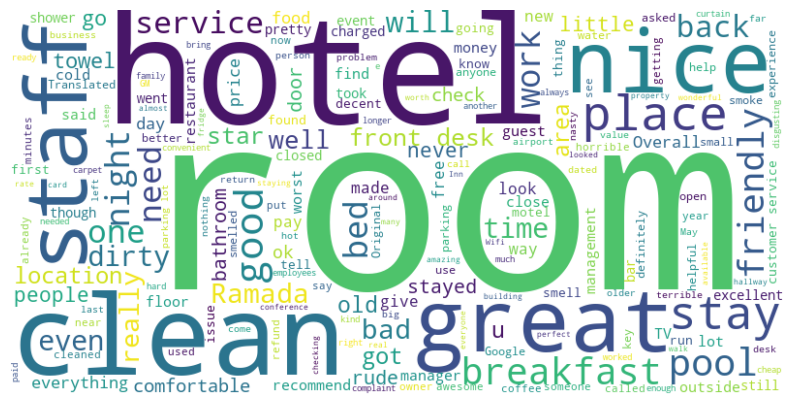

In [8]:
# Crear un WordCloud con las palabras de la columna 'review' de todos los Hoteles Ramada en los estados en los que tiene presencia
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtro_ramada['review']))

# Mostrar el Word Cloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# Análisis de sentimiento general

# Crear una nueva columna 'sentiment' para almacenar el resultado del análisis de sentimiento
filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)

# avg del sentiment
filtro_ramada['sentiment'].mean()

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_58193/812566771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)


0.20365189593675487

In [20]:
# total revies
filtro_ramada.shape
filtro_ramada['review'].count()

395

In [21]:
# Reviews por año
reviewsanio = filtro_ramada.groupby(filtro_ramada['date'].dt.year)['review'].count()
reviewsanio

date
2009      1
2011      2
2012      4
2013      6
2014      5
2015     27
2016    142
2017    114
2018     83
2019     10
2020      1
Name: review, dtype: int64

In [14]:
# Agrupar los datos por año y calcular el promedio del sentimiento para cada grupo
promedio_sentimiento_por_año = filtro_ramada.groupby(filtro_ramada['date'].dt.year)['sentiment'].mean()

print(promedio_sentimiento_por_año)

date
2009    0.046667
2011    0.254167
2012    0.305229
2013    0.272896
2014    0.182555
2015    0.271216
2016    0.324808
2017    0.148827
2018    0.059596
2019    0.025806
2020    0.500000
Name: sentiment, dtype: float64


In [22]:
filtro_ramada['rating'].mean()

3.1746835443037975

## El promedio de análisis de sentimiento de reviews a nivel nacional es de 0.20. En términos generales para la cadena Ramada en Estados Unidos hay un sentimiento positivo pero con una magnitud baja. Esto podría darse debido a opiniones neutrales o ligeramente negativas. Gracias a esto se podría inferir posibles campos de mejora en los servicios o instalaciones, por lo que será importante analizar las reviews de los diferentes hoteles en cada estado. Con ello se podrá determinar a ciencia cierta cuales son los hoteles que están impactando negativamente en la calificación y la toma de medidas directamente en ellos servirá para mejorar la calificación de la cadena en general.

In [34]:
# Análisis de sentimiento de los hoteles Ramada en los estados elegidos
filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Promedio de Análisis de sentimiento de los hoteles en los estados elegidos
sentiment = filtro_ramada.groupby(['state', 'business_name'])['sentiment'].mean().reset_index(name="sentiment")

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_58193/2376509214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)


In [45]:
# Hoteles Ramada por Estado con su AvgRating y sentimiento para determinar bajas calificaciones y en qué Estados Y/o hoteles se debe actuar primero
# Número de hoteles ramada por estado
business_name_counts = filtro_ramada.groupby('state')['business_name'].value_counts().reset_index(name='counts')
promedio_rating_por_business_name = filtro_ramada.groupby(['state', 'business_name'])['rating'].mean().reset_index(name='avg_rating')
# Merge 
m1 = pd.merge(business_name_counts, promedio_rating_por_business_name, on=['business_name', 'state'])
ramada = pd.merge(m1, sentiment, on=['business_name', 'state'])
ramada
#business_name_counts

state                                      business_name  counts  \
0     AZ                                    Ramada Glendale      38   
1     AZ                                 Ramada Tucson East      20   
2     AZ                     Ramada Flagstaff West Near NAU      12   
3     CA    Ramada San Jose Downtown Near Convention Center      24   
4     CO                         Ramada by Wyndham Monument      55   
5     CT                                      Ramada Mystic       8   
6     FL                          Ramada Clearwater Airport      10   
7     LA                                  Ramada Alexandria      17   
8     MN   Ramada Bloomington Minneapolis Airport/Mall Area      23   
9     MO                                   Ramada St Joseph      11   
10    MS                                    Ramada Gulfport      17   
11    NC                                Ramada Jacksonville       6   
12    NY          Ramada Plaza by Wyndham Rochester Airport      50   
13    NY  Ramada Amherst/Getzville Hotel and Conference ...      13   
14    OH                                Ramada Plaza Dayton      30   
15    OH          Ramada Toledo Hotel and Conference Center      19   
16    OK                          Ramada by Wyndham Clinton      21   
17    WV        Ramada Morgantown Hotel & Conference Center      21   

    avg_rating  sentiment  
0     3.263158   0.261895  
1     4.500000   0.311404  
2     3.750000   0.269423  
3     3.916667   0.420458  
4     2.600000   0.031265  
5     3.375000   0.301117  
6     3.500000   0.336670  
7     3.117647   0.214499  
8     3.913043   0.312310  
9     3.363636   0.190144  
10    3.294118   0.108385  
11    4.000000   0.348230  
12    2.280000  -0.012621  
13    3.461538   0.370940  
14    2.866667   0.220857  
15    3.421053   0.277898  
16    2.428571   0.123909  
17    3.571429   0.375760

## El Hotel con sentimiento más negativo es Ramada Plaza by Wyndham Rochester Airport en el Estado de Nueva York
## El Hotel con el sentimiento más positivo es Ramada San Jose Downtown Near Convention Center en el EStado de California

Esto nos permite identificar el orden de prioridades para enfoar esfuerzos a mejorar la satisfacción de clientes en donde es más baja. Así mismo verificar qué se está haciendo bien en los hoteles de mejor persepción y que podría ser implementado en los demás.

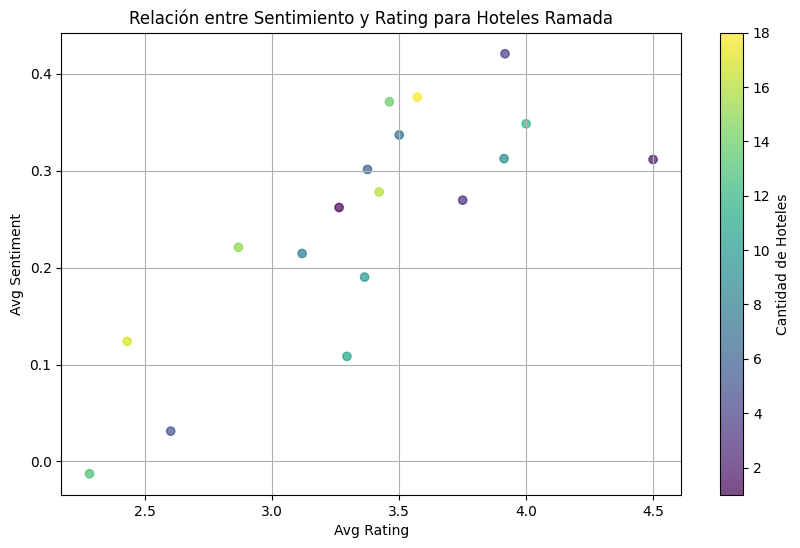

In [51]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ramada['avg_rating'], ramada['sentiment'], c=range(1, len(ramada['avg_rating']) + 1), cmap='viridis', alpha=0.7)
plt.xlabel('Avg Rating')
plt.ylabel('Avg Sentiment')
plt.title('Relación entre Sentimiento y Rating para Hoteles Ramada')
plt.colorbar(label='Cantidad de Hoteles')
plt.grid(True)
plt.show()

In [49]:
# KPI Promedio de Ratings (Avg Rating) Y sentimiento por Estado
avgrstate = ramada.groupby('state')['avg_rating'].mean().reset_index(name='avg_rating')
avgstate = ramada.groupby('state')['sentiment'].mean().reset_index(name='avg_sentiment')
avgs = pd.merge(avgrstate, avgstate, on='state')
avgs

state  avg_rating  avg_sentiment
0     AZ    3.837719       0.280907
1     CA    3.916667       0.420458
2     CO    2.600000       0.031265
3     CT    3.375000       0.301117
4     FL    3.500000       0.336670
5     LA    3.117647       0.214499
6     MN    3.913043       0.312310
7     MO    3.363636       0.190144
8     MS    3.294118       0.108385
9     NC    4.000000       0.348230
10    NY    2.870769       0.179160
11    OH    3.143860       0.249377
12    OK    2.428571       0.123909
13    WV    3.571429       0.375760

# KPI: 

## El promedio de rating y sentimiento por estado nos permite ubicar cuales son los estados en donde encontramos las calificaciones más bajas y más altas por ambos análisis. Por un lado, los estados con mejor rating son Carolina del Norte, California y Minesota; los de peor rating son Oklahoma, Colorado y New York con avg_rating inferior a 3.
## Así mismo los estados con mejor persepción son California, West Virginia y Carolina del Norte; y los de peor persepción son Colorado, Mississippi y Oklahoma.

---

# Análisis preliminar por cada Hotel - Se hará un análisis de sentimiento con los reviews y un wordcloud

In [180]:
# Se enmascara para obtener los datos de un solo hotel
mask = filtro_ramada['business_name'] == 'Ramada Glendale'
glendale = filtro_ramada[mask]

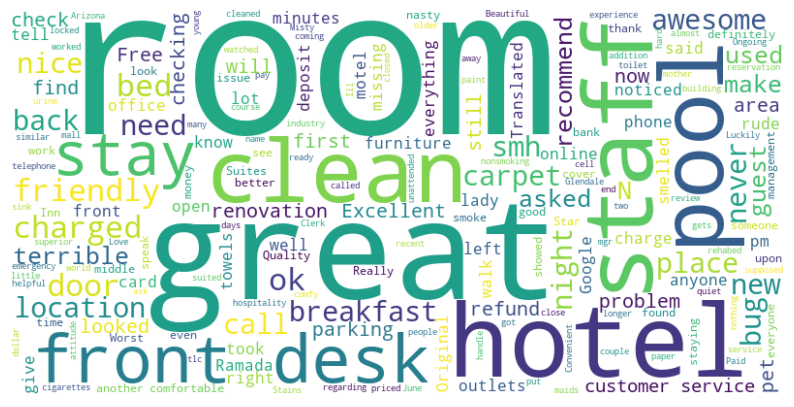

In [181]:
# Crear un WordCloud con las palabras de la columna 'review'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(glendale['review']))

# Mostrar el Word Cloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [172]:
# Buscar los reviews por cada hotel Ramada para hacer los modelos de NPL y análisis de sentimiento
mask = filtro_ramada['business_name'] == 'Ramada Plaza by Wyndham Rochester Airport'
airportny = filtro_ramada[mask]

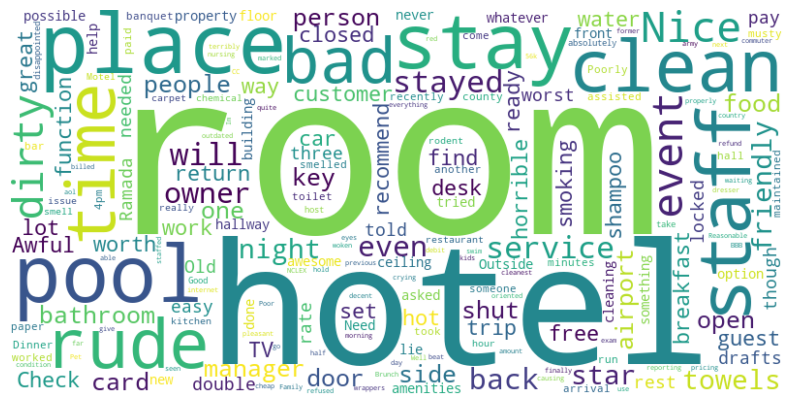

In [173]:
# Crear un WordCloud con las palabras de la columna 'review'
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(airportny['review']))

# Mostrar el Word Cloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [174]:
# Crear una nueva columna 'sentiment' para almacenar el resultado del análisis de sentimiento
airportny['sentiment'] = airportny['review'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Mostrar el DataFrame con la nueva columna 'sentiment'
print(airportny[['review', 'sentiment']])

                                                  review  sentiment
35335                                    Family oriented   0.000000
35336       Not the cleanest. Nice pool. Friendly staff.   0.487500
35337  The room had everything that we needed, but wa...   0.062500
35338  I stayed there the night before my NCLEX nursi...  -0.179630
35339           Brunch was decent, bathrooms were clean.   0.266667
35340  Well, this is a commuter hotel if I've ever se...   0.033333
35341  Very nice people here.  All were friendly.  Pl...   0.441333
35342  Room was clean. The hold on my CC was for doub...   0.183333
35343                  Poor room condition and services.  -0.400000
35344  Check-in was easy and customer service was ple...   0.188889
35345            Friendly staff,easy to find. Clean pool   0.370833
35346  i like this hotel,,, but the internet is like ...   0.000000
35347  We stayed at this Ramada for a volleyball tour...   0.040000
35348                                      Nice 

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_51417/2067988908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airportny['sentiment'] = airportny['review'].apply(lambda text: TextBlob(text).sentiment.polarity)


In [175]:
#Promedio de Análisis de Sentimiento del hotel Ramada Plaza by Wyndham Rochester Airport
airportny.groupby('business_name')['sentiment'].mean().reset_index(name='sentiment')

business_name  sentiment
0  Ramada Plaza by Wyndham Rochester Airport  -0.012621

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_51417/1044943769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)


In [24]:
# Análisis de sentimiento de los hoteles Ramada en los estados elegidos
filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Promedio de Análisis de sentimiento de los hoteles en los estados elegidos
filtro_ramada.groupby('business_name')['sentiment'].mean().reset_index(name="sentiment")

/var/folders/7b/x372r2jn4b95xj0_xs49ys4h0000gn/T/ipykernel_58193/4203986403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_ramada['sentiment'] = filtro_ramada['review'].apply(lambda text: TextBlob(text).sentiment.polarity)


business_name  sentiment
0                                   Ramada Alexandria   0.214499
1   Ramada Amherst/Getzville Hotel and Conference ...   0.370940
2    Ramada Bloomington Minneapolis Airport/Mall Area   0.312310
3                           Ramada Clearwater Airport   0.336670
4                      Ramada Flagstaff West Near NAU   0.269423
5                                     Ramada Glendale   0.261895
6                                     Ramada Gulfport   0.108385
7                                 Ramada Jacksonville   0.348230
8         Ramada Morgantown Hotel & Conference Center   0.375760
9                                       Ramada Mystic   0.301117
10                                Ramada Plaza Dayton   0.220857
11          Ramada Plaza by Wyndham Rochester Airport  -0.012621
12    Ramada San Jose Downtown Near Convention Center   0.420458
13                                   Ramada St Joseph   0.190144
14          Ramada Toledo Hotel and Conference Center   0.277898
15                                 Ramada Tucson East   0.311404
16                          Ramada by Wyndham Clinton   0.123909
17                         Ramada by Wyndham Monument   0.031265

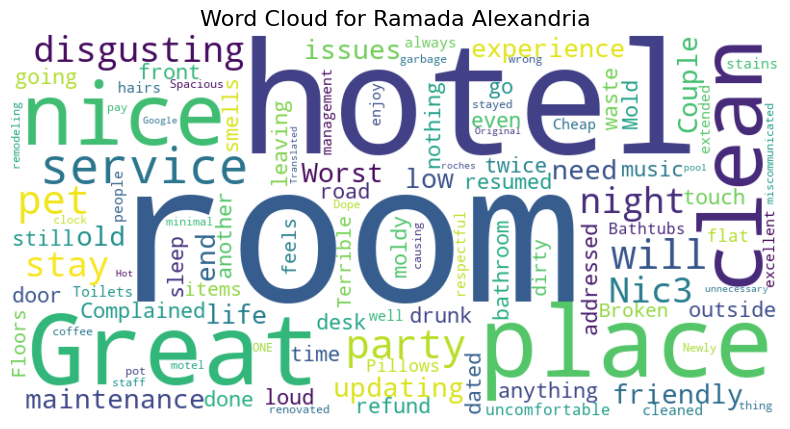

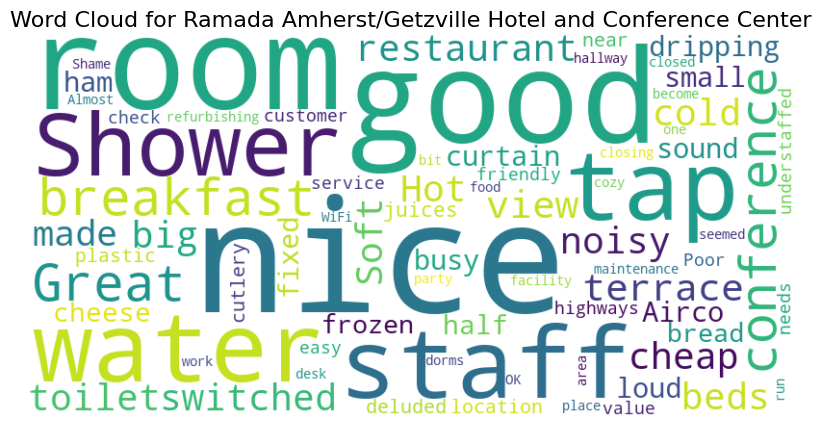

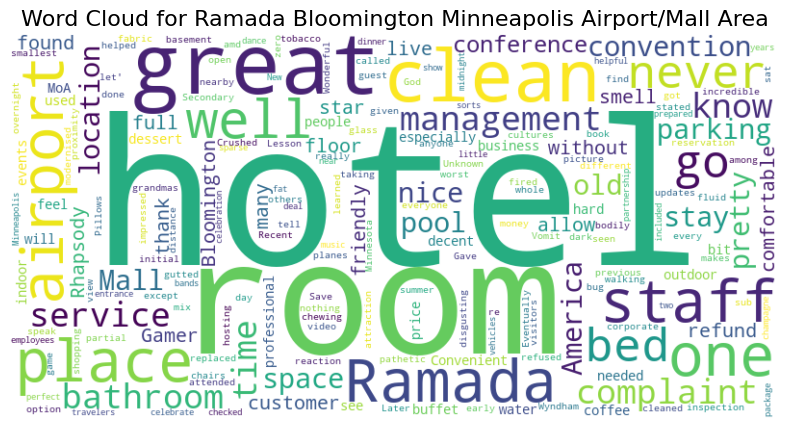

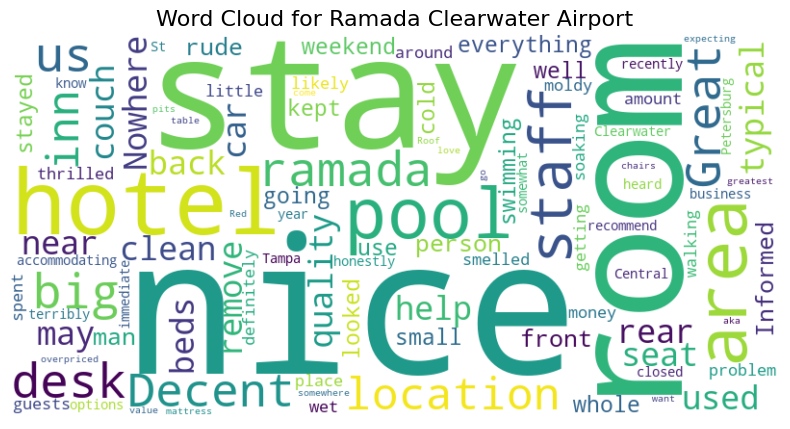

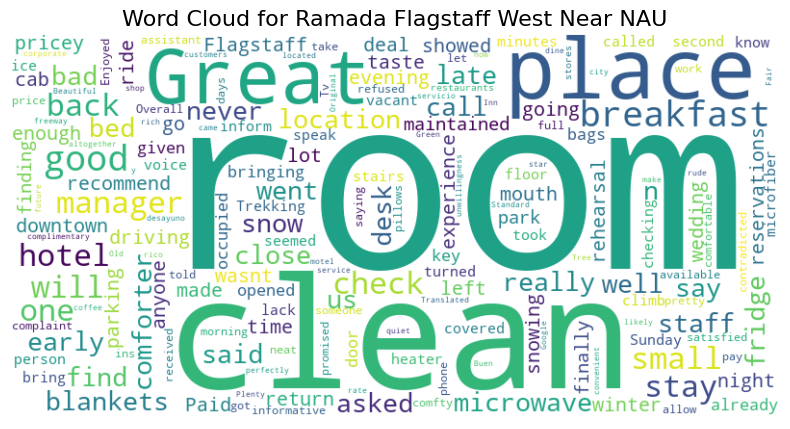

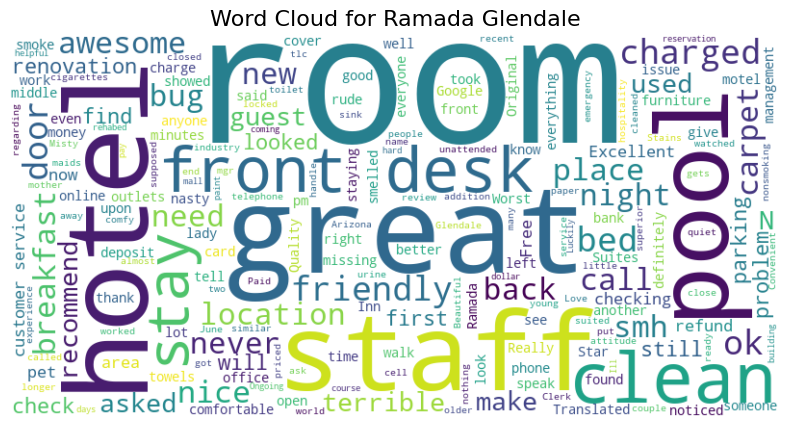

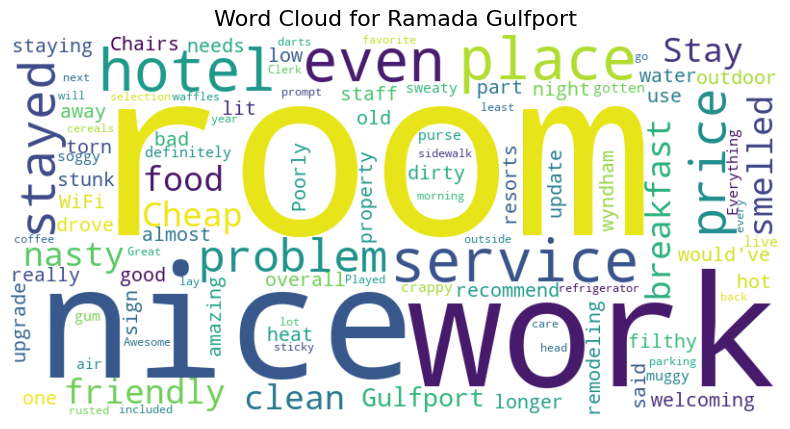

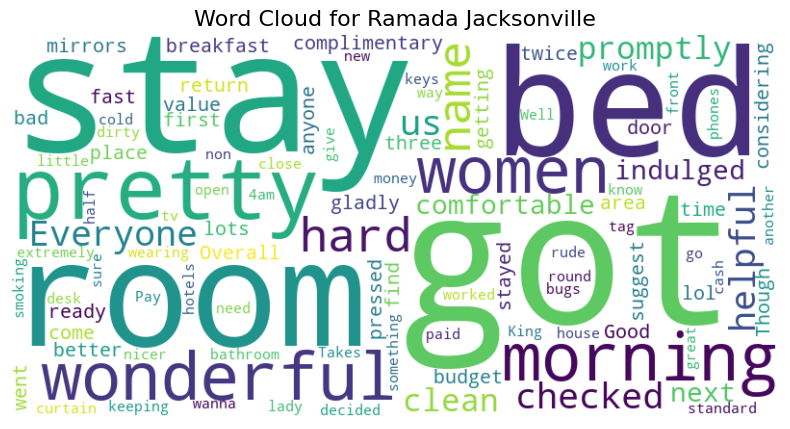

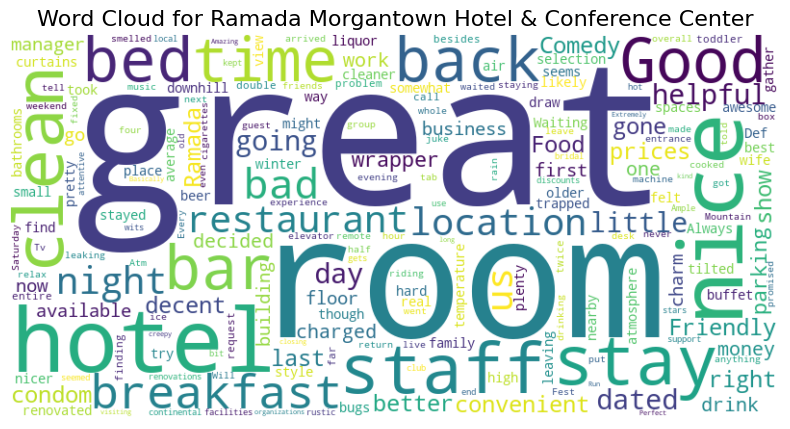

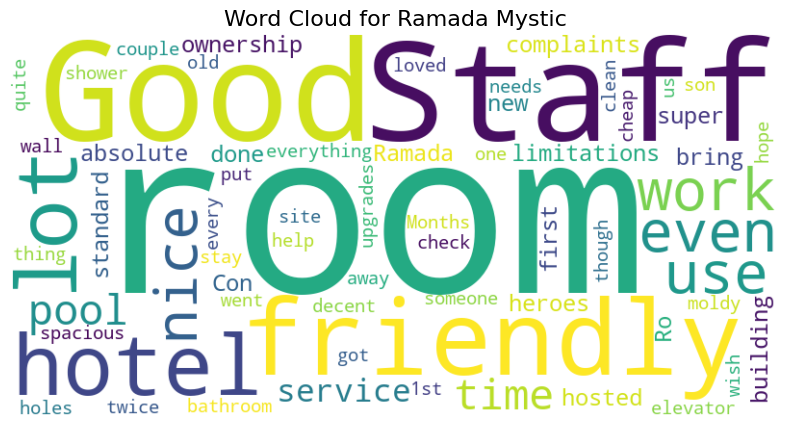

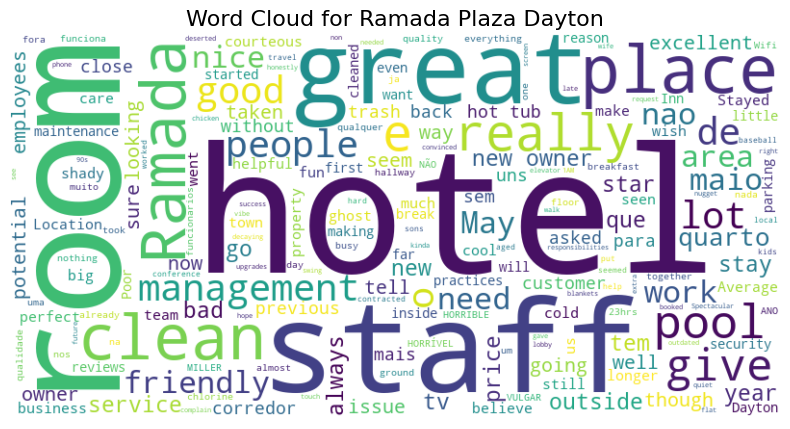

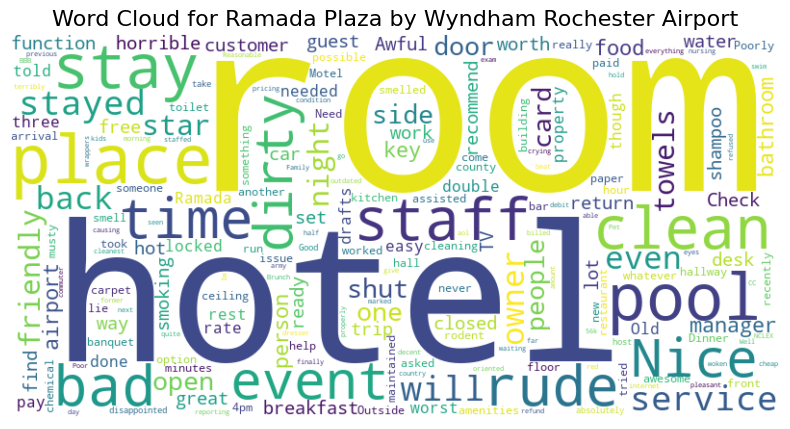

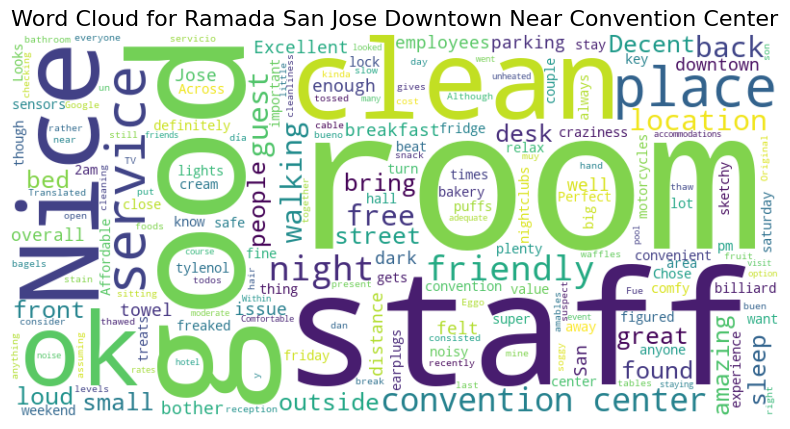

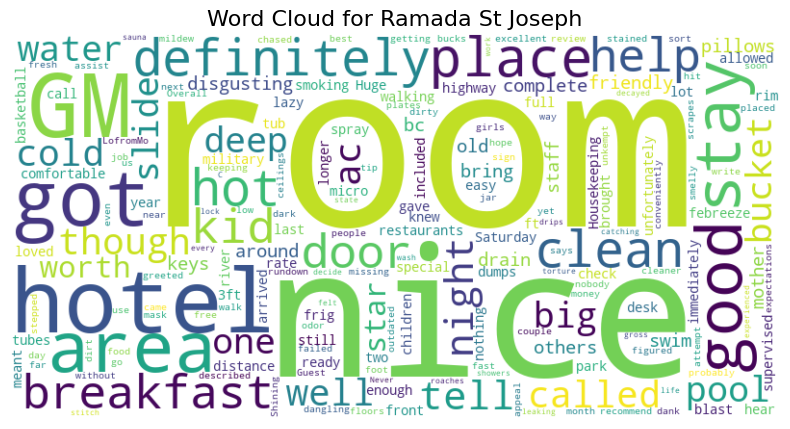

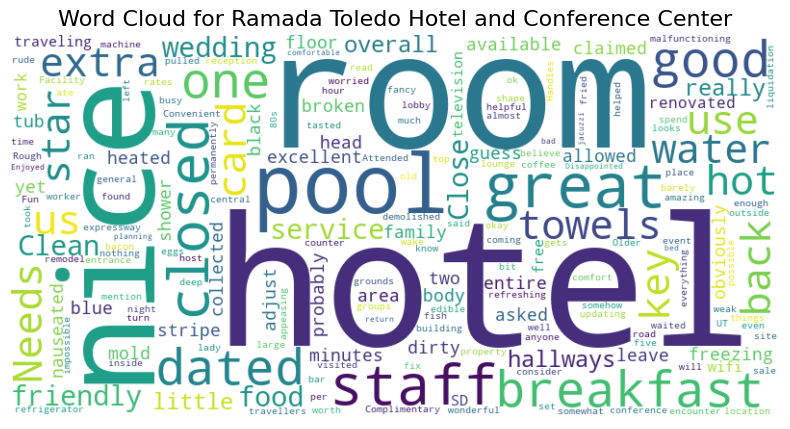

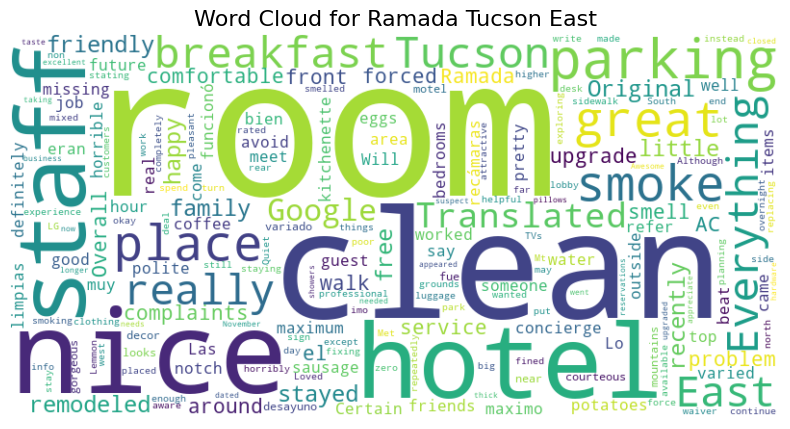

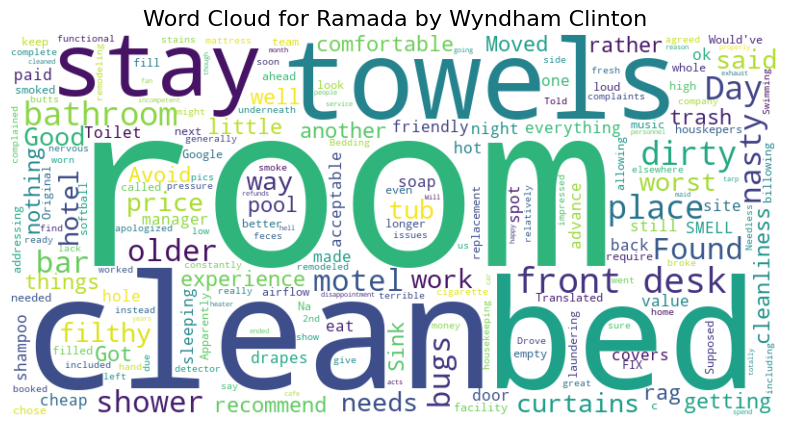

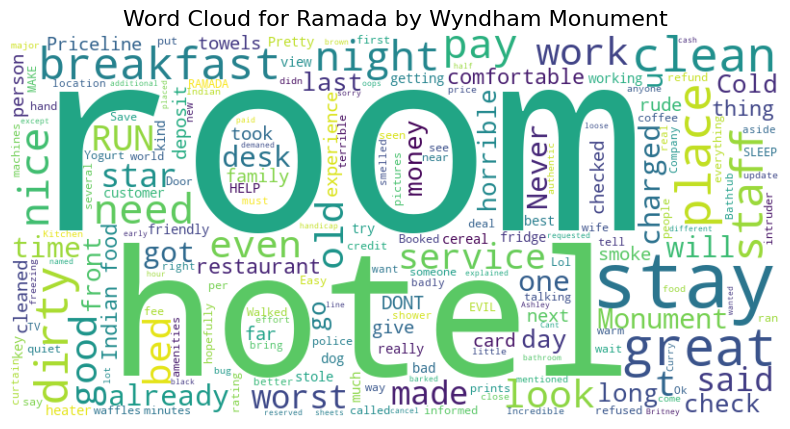

In [176]:
# Agrupar las reseñas por 'business_name'
grouped_reviews = filtro_ramada.groupby('business_name')['review'].apply(' '.join).reset_index()

# Crear un Word Cloud para cada grupo
for index, row in grouped_reviews.iterrows():
    business_name = row['business_name']
    review_text = row['review']

    # Crear el Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

    # Mostrar el Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {business_name}', fontsize=16)
    plt.axis('off')
    plt.show()

In [13]:
# Hoteles que más se repiten para ver las cadenas más grandes
df['business_name'].value_counts()

Sheraton Fisherman's Wharf Hotel           657
Carson Hot Springs Resort                  368
Hawthorn Suites By Wyndham Jacksonville    242
Siena Golf Club                            190
Super 8 by Wyndham Los Angeles             189
                                          ... 
Imperial Palace                              3
Sorrento Tower                               3
Olympic Dreams Chalet                        3
Hotel Kissimee                               2
Vantaggio Suites Broadway                    2
Name: business_name, Length: 479, dtype: int64

In [14]:
df['state'].unique()

array(['NV', 'FL', 'CA', 'NY', 'TX'], dtype=object)

In [27]:
# Configurar pandas para mostrar todas las filas y columnas sin truncar
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
# Conteo de hoteles por Estado
cantidad_hoteles_state = df.groupby('state')['business_name'].value_counts()
cantidad_hoteles_state = cantidad_hoteles_state.reset_index(name='hoteles')

# Agregar el promedio de rating por 'business_name'
promedio_rating_por_hotel = df.groupby('business_name')['rating'].mean()
promedio_rating_por_hotel = promedio_rating_por_hotel.reset_index(name='avg_rating')

# Fusionar los DataFrames por 'business_name'
cantidad_hoteles_state = cantidad_hoteles_state.merge(promedio_rating_por_hotel, on='business_name')

# Imprimir el resultado
cantidad_hoteles_state

state                                      business_name  hoteles  \
0      CA                   Sheraton Fisherman's Wharf Hotel      657   
1      CA                     Super 8 by Wyndham Los Angeles      189   
2      CA                Paradise by the Sea Beach RV Resort      179   
3      CA                                Pajaro Dunes Resort      163   
4      CA                        Loews Regency San Francisco      129   
5      CA                 Red Lion Hotel Woodlake Sacramento       70   
6      CA                           Econo Lodge Inn & Suites       65   
7      CA                   Marina Bay Inn & Suites Richmond       63   
8      CA                            The Monroe Palm Springs       58   
9      CA                                Discovery Inn Ukiah       51   
10     CA                                        Rodeway Inn       50   
11     FL                                        Rodeway Inn       24   
12     TX                                        Rodeway Inn       53   
13     CA                                 Elderberry Commons       46   
14     CA                               Rodeway Inn & Suites       34   
15     CA                                     San Benito Inn       34   
16     CA  Howard Johnson Los Angeles/Near Convention Center       31   
17     CA                            Lake Sonoma Resort Area       31   
18     CA                Days Inn San Francisco At The Beach       28   
19     CA                     The Spa at Rancho Bernardo Inn       28   
20     CA                                Edge 'o' town motel       25   
21     CA                                    Tortuga Del Sol       25   
22     CA      Americas Best Value Inn & Suites Wine Country       24   
23     CA                  Motel 6 Castroville - Monterey CA       24   
24     CA    Ramada San Jose Downtown Near Convention Center       24   
25     CA                                       San Juan Inn       24   
26     CA                                Drift Inn RV Resort       23   
27     CA                              The Rose Hotel Venice       23   
28     CA                                        Econo Lodge       22   
29     FL                                        Econo Lodge       23   
30     NY                                        Econo Lodge       36   
31     TX                                        Econo Lodge       27   
32     CA                                      royal oak inn       22   
33     CA                   Americas Best Value Inn & Suites       20   
34     CA                        Perfect Tan | Light Therapy       20   
35     CA                        Rivers Edge Marina & Resort       20   
36     CA                               Silver Saddle Resort       20   
37     CA                                        Comfort Inn       19   
38     CA                                    Days Inn Madera       19   
39     CA                                        Quality Inn       19   
40     NY                                        Quality Inn       70   
41     CA                          Market Street Manor Motel       18   
42     CA                          Quality Inn Anaheim North       18   
43     CA                                         Chalet 114       17   
44     CA                                     Tahoe City Inn       17   
45     CA                                            Cha Spa       16   
46     CA                               Rio Palace Motor Inn       16   
47     CA                                 Knights Inn Fresno       15   
48     CA       Super 8 Westminster CA/Huntington Beach Area       15   
49     CA                                  The Nest on Fifth       15   
50     CA                                         Aqua Motel       14   
51     CA                     Palos Verdes Inn Redondo Beach       14   
52     CA                                       La Jolla Inn       13   
53     CA                           Travelodge Crescent City  

In [34]:
#Conteo de hoteles por Estado
cantidad_hoteles_state = df.groupby('state')['business_name'].value_counts()
cantidad_hoteles_state = cantidad_hoteles_state.reset_index(name='hoteles')

In [35]:
cantidad_hoteles_state

state                                      business_name  hoteles
0      CA                   Sheraton Fisherman's Wharf Hotel      657
1      CA                     Super 8 by Wyndham Los Angeles      189
2      CA                Paradise by the Sea Beach RV Resort      179
3      CA                                Pajaro Dunes Resort      163
4      CA                        Loews Regency San Francisco      129
5      CA                 Red Lion Hotel Woodlake Sacramento       70
6      CA                           Econo Lodge Inn & Suites       65
7      CA                   Marina Bay Inn & Suites Richmond       63
8      CA                            The Monroe Palm Springs       58
9      CA                                Discovery Inn Ukiah       51
10     CA                                        Rodeway Inn       50
11     CA                                 Elderberry Commons       46
12     CA                               Rodeway Inn & Suites       34
13     CA                                     San Benito Inn       34
14     CA  Howard Johnson Los Angeles/Near Convention Center       31
15     CA                            Lake Sonoma Resort Area       31
16     CA                Days Inn San Francisco At The Beach       28
17     CA                     The Spa at Rancho Bernardo Inn       28
18     CA                                Edge 'o' town motel       25
19     CA                                    Tortuga Del Sol       25
20     CA      Americas Best Value Inn & Suites Wine Country       24
21     CA                  Motel 6 Castroville - Monterey CA       24
22     CA    Ramada San Jose Downtown Near Convention Center       24
23     CA                                       San Juan Inn       24
24     CA                                Drift Inn RV Resort       23
25     CA                              The Rose Hotel Venice       23
26     CA                                        Econo Lodge       22
27     CA                                      royal oak inn       22
28     CA                   Americas Best Value Inn & Suites       20
29     CA                        Perfect Tan | Light Therapy       20
30     CA                        Rivers Edge Marina & Resort       20
31     CA                               Silver Saddle Resort       20
32     CA                                        Comfort Inn       19
33     CA                                    Days Inn Madera       19
34     CA                                        Quality Inn       19
35     CA                          Market Street Manor Motel       18
36     CA                          Quality Inn Anaheim North       18
37     CA                                         Chalet 114       17
38     CA                                     Tahoe City Inn       17
39     CA                                            Cha Spa       16
40     CA                               Rio Palace Motor Inn       16
41     CA                                 Knights Inn Fresno       15
42     CA       Super 8 Westminster CA/Huntington Beach Area       15
43     CA                                  The Nest on Fifth       15
44     CA                                         Aqua Motel       14
45     CA                     Palos Verdes Inn Redondo Beach       14
46     CA                                       La Jolla Inn       13
47     CA                           Travelodge Crescent City       13
48     CA                                    Coloma Cottages       12
49     CA                                Covered Wagon MOTEL       12
50     CA                                 Econo Inn & Suites       12
51     CA                     Hotel Woodland Banquet Facilty       12
52     CA  LA 한인 민박 팜츄리 게스트 하우스 (카톡 : jongok0420 / 인스타그램 ...       12
53     CA          Best Western Golden Triangle Inn - Closed       11
54     CA                                    Imperial Suites       11
55     CA                                Puddingstone Resort       11
56     CA     

In [18]:
# Paso 1: Filtrar los datos para obtener solo los registros de la cadena de hoteles deseada.
cadena_hotel = "Sheraton Fisherman's Wharf Hotel"
datos_cadena = df[df["business_name"] == cadena_hotel]

# Paso 2: Calcular el rating promedio por estado.
rating_promedio_por_estado = datos_cadena.groupby("state")["rating"].mean()

# Mostrar los resultados
print(rating_promedio_por_estado)

state
CA    3.986301
Name: rating, dtype: float64


In [17]:
df[df['business_name'] == "Sheraton Fisherman's Wharf Hotel"].head()

user_id                  user_name        date  rating  \
4337  111151135343394821691  Deb OHara-Slaughter (Deb)  2019-07-03       5   
4338  106526490551574748029                Anita Brown  2017-11-06       4   
4339  116600105708585783882              Edwin Ragadio  2017-05-15       4   
4340  115288906583748455325                 Matt Morio  2019-05-15       5   
4341  104543198262200412353                Christine B  2018-12-11       5   

                                                 review  \
4337  I cannot say enough great things about this ho...   
4338  Dated interiors in the roomy sunny  and very c...   
4339  If you're coming to San Francisco and looking ...   
4340  Located in the touristy fisherman's wharf area...   
4341  This place is awesome! Great rooms, bar and lo...   

                                    gmap_id                     business_name  \
4337  0x808580e4a4c38edf:0x9cb0d6a9ad8316b9  Sheraton Fisherman's Wharf Hotel   
4338  0x808580e4a4c38edf:0x9cb0d6a9ad8316b9  Sheraton Fisherman's Wharf Hotel   
4339  0x808580e4a4c38edf:0x9cb0d6a9ad8316b9  Sheraton Fisherman's Wharf Hotel   
4340  0x808580e4a4c38edf:0x9cb0d6a9ad8316b9  Sheraton Fisherman's Wharf Hotel   
4341  0x808580e4a4c38edf:0x9cb0d6a9ad8316b9  Sheraton Fisherman's Wharf Hotel   

                                                address   latitude  \
4337  Sheraton Fisherman's Wharf Hotel, s/n, Mason S...  37.804873   
4338  Sheraton Fisherman's Wharf Hotel, s/n, Mason S...  37.804873   
4339  Sheraton Fisherman's Wharf Hotel, s/n, Mason S...  37.804873   
4340  Sheraton Fisherman's Wharf Hotel, s/n, Mason S...  37.804873   
4341  Sheraton Fisherman's Wharf Hotel, s/n, Mason S...  37.804873   

       longitude   category  avg_rating  num_of_reviews state  
4337 -122.413449  ['Hotel']         3.9            2545    CA  
4338 -122.413449  ['Hotel']         3.9            2545    CA  
4339 -122.413449  ['Hotel']         3.9            2545    CA  
4340 -122.413449  ['Hotel']         3.9            2545    CA  
4341 -122.413449  ['Hotel']         3.9            2545    CA